In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("/kaggle/input/personal-carbon-footprint-behavior-dataset/personal_carbon_footprint_behavior.csv")

df.head()

,user_id,day_type,transport_mode,distance_km,electricity_kwh,renewable_usage_pct,food_type,screen_time_hours,waste_generated_kg,eco_actions,carbon_footprint_kg,carbon_impact_level
0,1,Weekend,EV,1.55,6.12,0,Non-Veg,2.4,0.70,1,11.03,High
1,1,Weekend,Walk,10.04,4.50,0,Mixed,4.1,0.54,1,7.44,Medium
2,1,Weekday,Walk,15.27,2.81,0,Mixed,4.0,0.51,1,6.01,Medium
3,1,Weekend,Walk,0.50,10.16,0,Mixed,6.3,0.73,0,12.70,High
4,1,Weekend,Walk,3.60,5.02,50,Mixed,5.1,0.64,0,6.33,Medium


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              1400 non-null   int64  
 1   day_type             1400 non-null   object 
 2   transport_mode       1400 non-null   object 
 3   distance_km          1400 non-null   float64
 4   electricity_kwh      1400 non-null   float64
 5   renewable_usage_pct  1400 non-null   int64  
 6   food_type            1400 non-null   object 
 7   screen_time_hours    1400 non-null   float64
 8   waste_generated_kg   1400 non-null   float64
 9   eco_actions          1400 non-null   int64  
 10  carbon_footprint_kg  1400 non-null   float64
 11  carbon_impact_level  1400 non-null   object 
dtypes: float64(5), int64(3), object(4)
memory usage: 131.4+ KB


In [4]:
df.describe()

,user_id,distance_km,electricity_kwh,renewable_usage_pct,screen_time_hours,waste_generated_kg,eco_actions,carbon_footprint_kg
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,100.500000,9.106071,5.951443,31.589286,5.521786,0.703200,1.144286,7.980236
std,57.754936,4.734692,1.993266,30.598496,2.018918,0.236415,1.019066,2.657858
min,1.000000,0.500000,2.000000,0.000000,2.000000,0.100000,0.000000,1.790000
25%,50.750000,5.662500,4.530000,0.000000,3.800000,0.550000,0.000000,6.080000
50%,100.500000,9.180000,5.925000,25.000000,5.550000,0.705000,1.000000,7.835000
75%,150.250000,12.510000,7.290000,50.000000,7.300000,0.860000,2.000000,9.830000
max,200.000000,22.670000,12.270000,100.000000,9.000000,1.510000,5.000000,16.020000


In [5]:
print("Shape:", df.shape)

Shape: (1400, 12)


In [6]:
df.isnull().sum()

user_id                0
day_type               0
transport_mode         0
distance_km            0
electricity_kwh        0
renewable_usage_pct    0
food_type              0
screen_time_hours      0
waste_generated_kg     0
eco_actions            0
carbon_footprint_kg    0
carbon_impact_level    0
dtype: int64

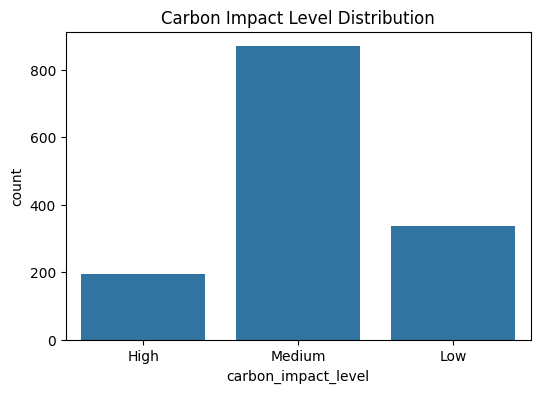

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x="carbon_impact_level", data=df)
plt.title("Carbon Impact Level Distribution")
plt.show()

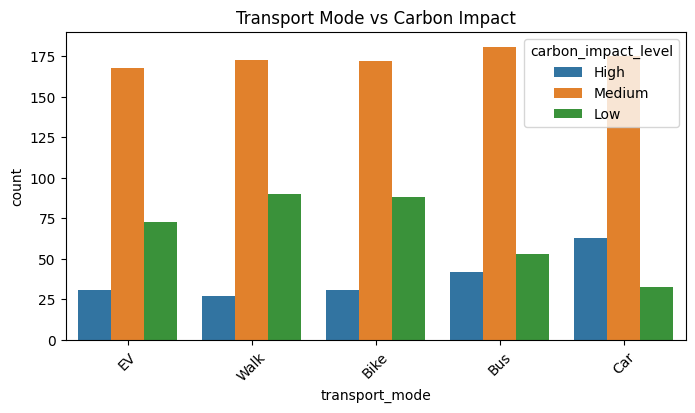

In [8]:
plt.figure(figsize=(8,4))
sns.countplot(x="transport_mode", hue="carbon_impact_level", data=df)
plt.title("Transport Mode vs Carbon Impact")
plt.xticks(rotation=45)
plt.show()

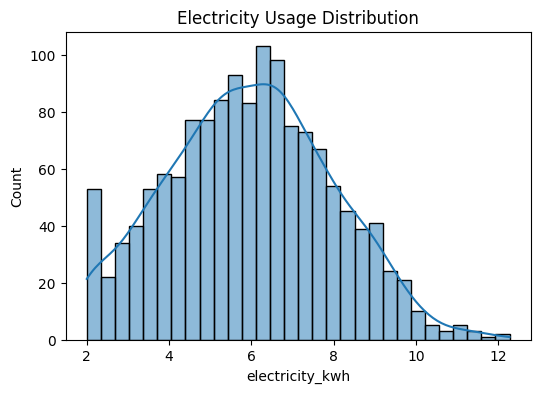

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df["electricity_kwh"], bins=30, kde=True)
plt.title("Electricity Usage Distribution")
plt.show()

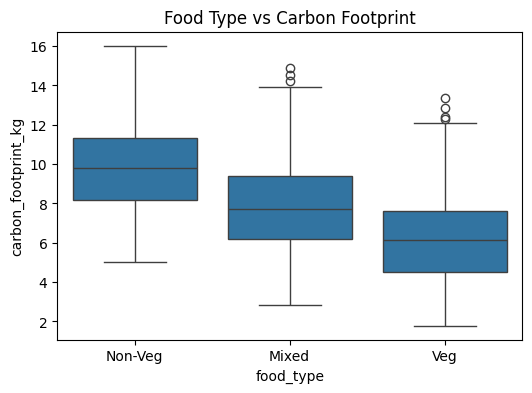

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x="food_type", y="carbon_footprint_kg", data=df)
plt.title("Food Type vs Carbon Footprint")
plt.show()

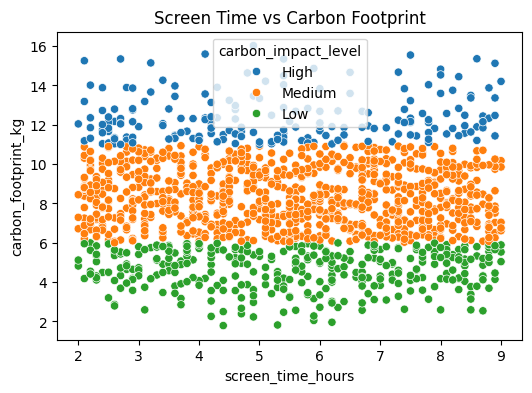

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="screen_time_hours", y="carbon_footprint_kg", hue="carbon_impact_level", data=df)
plt.title("Screen Time vs Carbon Footprint")
plt.show()

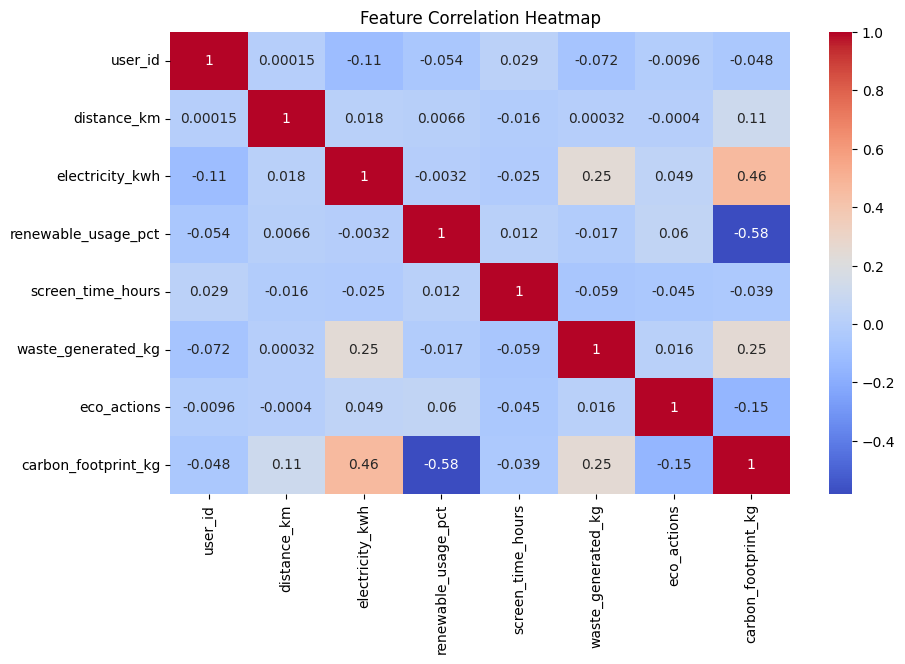

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [13]:
label_encoders = {}

categorical_cols = [
    "day_type",
    "transport_mode",
    "food_type",
    "carbon_impact_level"
]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [14]:
X = df.drop(["carbon_impact_level"], axis=1)
y = df["carbon_impact_level"]

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight="balanced"
)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

In [18]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9964285714285714

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       1.00      1.00      1.00        67
           2       0.99      1.00      1.00       174

    accuracy                           1.00       280
   macro avg       1.00      0.99      0.99       280
weighted avg       1.00      1.00      1.00       280



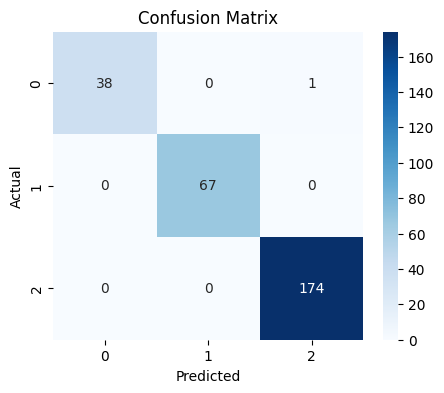

In [19]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

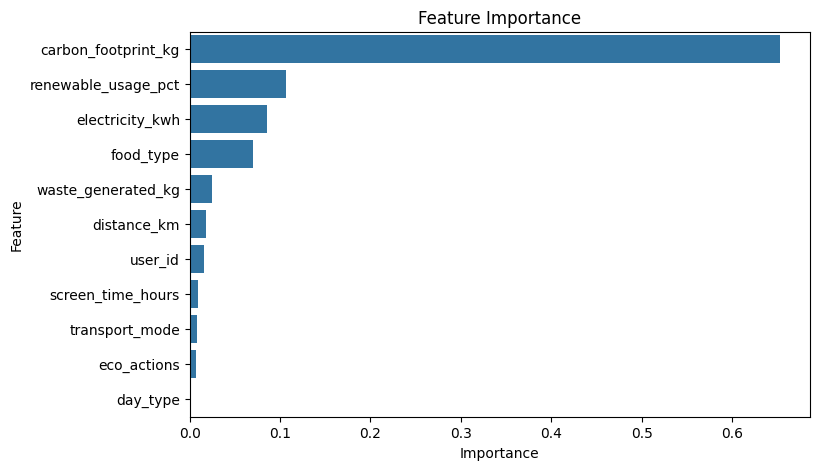

In [20]:
importances = model.feature_importances_
features = X.columns

feat_imp = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Feature Importance")
plt.show()

In [21]:
feat_imp.head(10)

,Feature,Importance
10,carbon_footprint_kg,0.653304
5,renewable_usage_pct,0.106700
4,electricity_kwh,0.085633
6,food_type,0.069763
8,waste_generated_kg,0.024313
3,distance_km,0.017545
0,user_id,0.015779
7,screen_time_hours,0.009620
2,transport_mode,0.008195
9,eco_actions,0.007390


## Conclusion

The model demonstrates exceptionally strong performance in predicting carbon impact levels, achieving an overall accuracy of 99.64%. Precision, recall, and F1-scores are consistently high across all three classes (Low, Medium, High), indicating that the model not only predicts correctly but also maintains a balanced performance without bias toward any single class.

The near-perfect classification results suggest that the selected features effectively capture real-world sustainability behavior patterns and have a strong relationship with carbon impact outcomes. This makes the model highly reliable for practical use cases, such as personal carbon footprint assessment, behavioral sustainability analysis, and decision-support systems for environmental awareness.